In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
import datetime
from plotly.subplots import make_subplots

In [2]:
start_date = datetime.datetime(2020,1,1)
end_date = datetime.datetime(2025,1,1)
data = yf.download('IRCTC.NS',start = start_date , end = end_date)
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,IRCTC.NS,IRCTC.NS,IRCTC.NS,IRCTC.NS,IRCTC.NS
Date,,,,,
2020-01-01,181.696198,183.524039,179.858756,181.224818,8593275
2020-01-02,179.012192,181.628880,178.367642,181.628880,3287655
2020-01-03,179.204575,181.532655,178.463817,178.550410,4342850
2020-01-06,172.095276,178.367633,171.258326,178.358003,3923670
2020-01-07,174.586884,177.299779,172.585886,172.585886,3486795
...,...,...,...,...,...
2024-12-24,785.550781,789.683711,776.189538,784.106742,834321
2024-12-26,779.177185,788.936805,775.293226,784.803875,827630


In [3]:
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

In [4]:
data = data.rename(columns ={'Close_IRCTC.NS':'Close','High_IRCTC.NS':'High','Low_IRCTC.NS':'Low','Open_IRCTC.NS':'Open','Volume_IRCTC.NS':'Volume'})

**Descriptive Statistics**

In [5]:
data[['Volume','High','Close','Open','Low']].describe()

,Volume,High,Close,Open,Low
count,1.238000e+03,1238.000000,1238.000000,1238.000000,1238.000000
mean,6.040740e+06,617.429366,607.919873,608.765401,599.406349
std,1.005404e+07,251.148323,247.001602,247.974190,243.451845
min,2.809300e+05,159.559557,157.702866,149.821584,149.821584
25%,1.377924e+06,349.435349,341.011459,341.816514,335.358254
50%,2.679861e+06,643.968388,635.497467,636.605127,627.710733
75%,6.009192e+06,818.856756,807.403244,804.422246,792.695996
max,9.833392e+07,1241.086580,1140.461548,1198.147299,1101.738972


In [6]:
fig = make_subplots(rows = 4,cols = 1, subplot_titles=['High','Low','Close','Open'])
fig.add_trace(go.Scatter( x = data.index, y=data['High'], name = 'High Price'), row = 1, col = 1)
fig.add_trace(go.Scatter( x = data.index, y = data['Low'], name = 'Low Price'), row = 2, col = 1)
fig.add_trace(go.Scatter( x = data.index, y = data['Close'], name = 'Close Price'), row = 3, col = 1)
fig.add_trace(go.Scatter( x = data.index, y = data['Open'], name = 'Open Price'), row = 4, col =1)
fig.update_layout(height = 1000, width = 800 , title = 'Stock Price Analysis')
fig.show()

In [7]:
data['rolling_mean'] = data['Close'].rolling(window = 10).mean()
data['rolling_std'] = data['Close'].rolling(window = 10).std()
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data['Close'], name = 'Close Price '))
fig.add_trace(go.Scatter(x = data.index, y = data['rolling_mean'], name = 'Rolling Mean'))
fig.add_trace(go.Scatter(x = data.index, y = data['rolling_std'], name = 'Rolling Std'))
fig.show()

In [8]:
data.index = pd.to_datetime(data.index)

**ACF and PACF Plot**

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

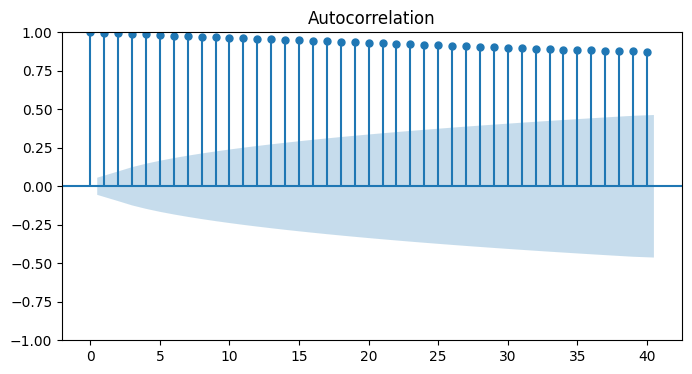

In [10]:
fig , ax = plt.subplots(figsize = (8,4))
plot_acf(data['Close'], lags = 40, ax = ax)
plt.show()

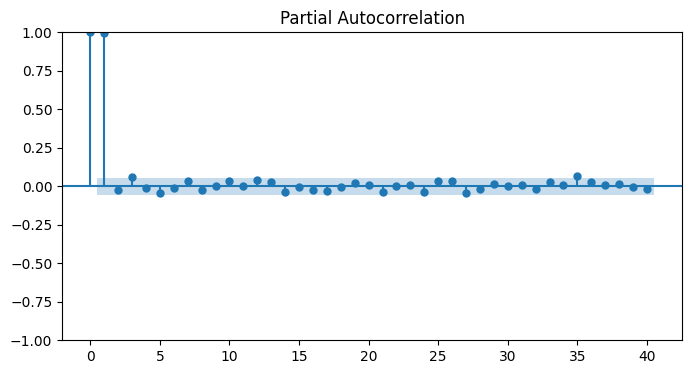

In [11]:
fig , ax = plt.subplots(figsize = (8,4))
plot_pacf(data['Close'], lags = 40, ax = ax)
plt.show()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
data

,Close,High,Low,Open,Volume,rolling_mean,rolling_std
Date,,,,,,,
2020-01-01,181.696198,183.524039,179.858756,181.224818,8593275,NaN,NaN
2020-01-02,179.012192,181.628880,178.367642,181.628880,3287655,NaN,NaN
2020-01-03,179.204575,181.532655,178.463817,178.550410,4342850,NaN,NaN
2020-01-06,172.095276,178.367633,171.258326,178.358003,3923670,NaN,NaN
2020-01-07,174.586884,177.299779,172.585886,172.585886,3486795,NaN,NaN
...,...,...,...,...,...,...,...
2024-12-24,785.550781,789.683711,776.189538,784.106742,834321,814.620575,25.550276
2024-12-26,779.177185,788.936805,775.293226,784.803875,827630,807.345667,24.061554
2024-12-27,776.040161,782.762357,774.048399,774.048399,636165,801.305646,23.521479


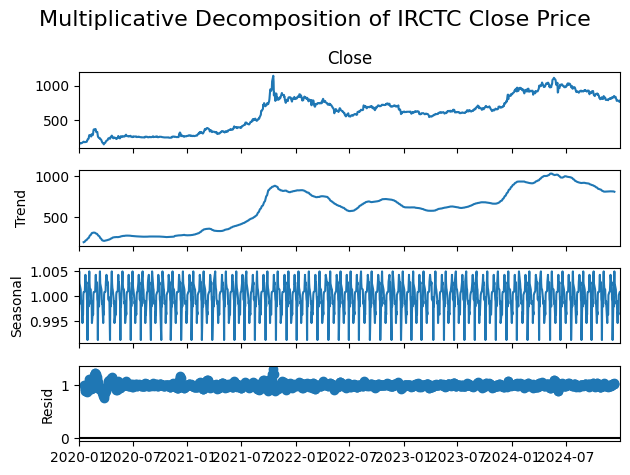

In [14]:
results = seasonal_decompose(data['Close'], model = 'multiplicative', period = 24 )
results.plot()
plt.suptitle('Multiplicative Decomposition of IRCTC Close Price', fontsize=16)
plt.tight_layout()
plt.show()

**Checking Close Price data for Stationary and normality**

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [16]:
result = adfuller(data['Close'], autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
      print ("Reject Null Hypothesis. So, Time Series is Stationary")
  else:
      print ("Failed to reject Null Hypothesis. So, Time Series is Non-Stationary")
  print("\n")


ADF Statistic: -1.6121170509778142
p-value: 0.4768643688877196
Critical values:
	1%: -3.436
Failed to reject Null Hypothesis. So, Time Series is Non-Stationary


	5%: -2.864
Failed to reject Null Hypothesis. So, Time Series is Non-Stationary


	10%: -2.568
Failed to reject Null Hypothesis. So, Time Series is Non-Stationary




**Normality Test**

In [17]:
from scipy.stats import normaltest

In [18]:
stat, p = normaltest(data['Close'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
print('Critical Values:')
for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
alpha = 0.05
if p > alpha:
    print('Data is normally distributed (fail to reject H0)')
else:
    print('Data is not normally distributed(reject H0)')
print('\n')

Statistics=624.713, p=0.000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Data is not normally distributed(reject H0)




In [19]:
## Compute the First order difference
data['Difference'] = data['Close'].diff()
data = data.dropna()

In [20]:
result = adfuller(data['Difference'], autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
  if result[0] < result[4]["5%"]:
      print ("Reject Null Hypothesis. So, Time Series is Stationary")
  else:
      print ("Failed to reject Null Hypothesis. So, Time Series is Non-Stationary")
  print("\n")


ADF Statistic: -7.451621275312153
p-value: 5.650854592117853e-11
Critical values:
	1%: -3.436
Reject Null Hypothesis. So, Time Series is Stationary


	5%: -2.864
Reject Null Hypothesis. So, Time Series is Stationary


	10%: -2.568
Reject Null Hypothesis. So, Time Series is Stationary




**ARIMA Model**

In [21]:
!pip install pmdarima

In [22]:
!pip install numpy==1.23.5
import numpy as np
print("NumPy version:", np.__version__)

NumPy version: 1.23.5


In [23]:
from pmdarima import auto_arima

In [24]:
df_close = data['Close']
df_log = np.log(df_close)

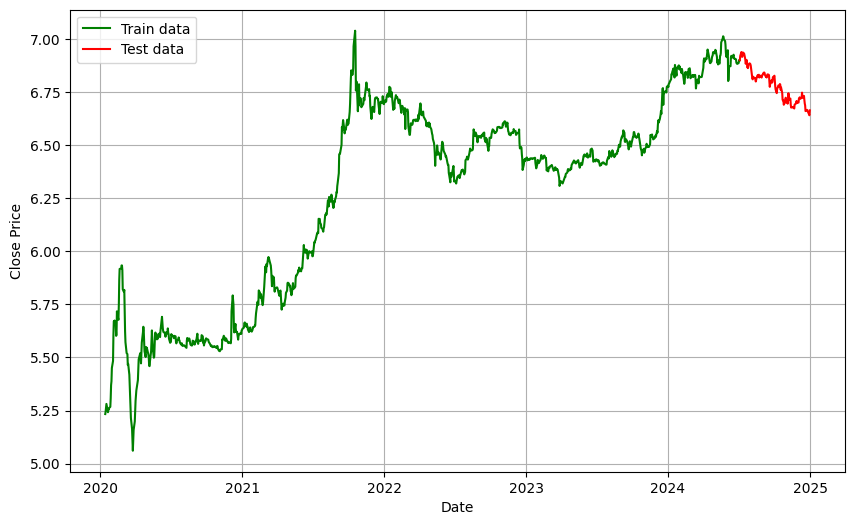

In [25]:
train_data, test_data = df_log[0:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize = (10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train_data,'green', label = 'Train data')
plt.plot(test_data, 'red', label = 'Test data')
plt.legend()
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4916.836, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4943.135, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4944.415, Time=1.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4915.160, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4942.576, Time=1.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4942.554, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4941.390, Time=5.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-4943.640, Time=0.43 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 9.487 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1106
Model:               SARIMAX(0, 1, 1)   Log Likelihood                2475.208
Date:                Tue, 22 Apr 2025   AIC                          -4944.415
Time:                       

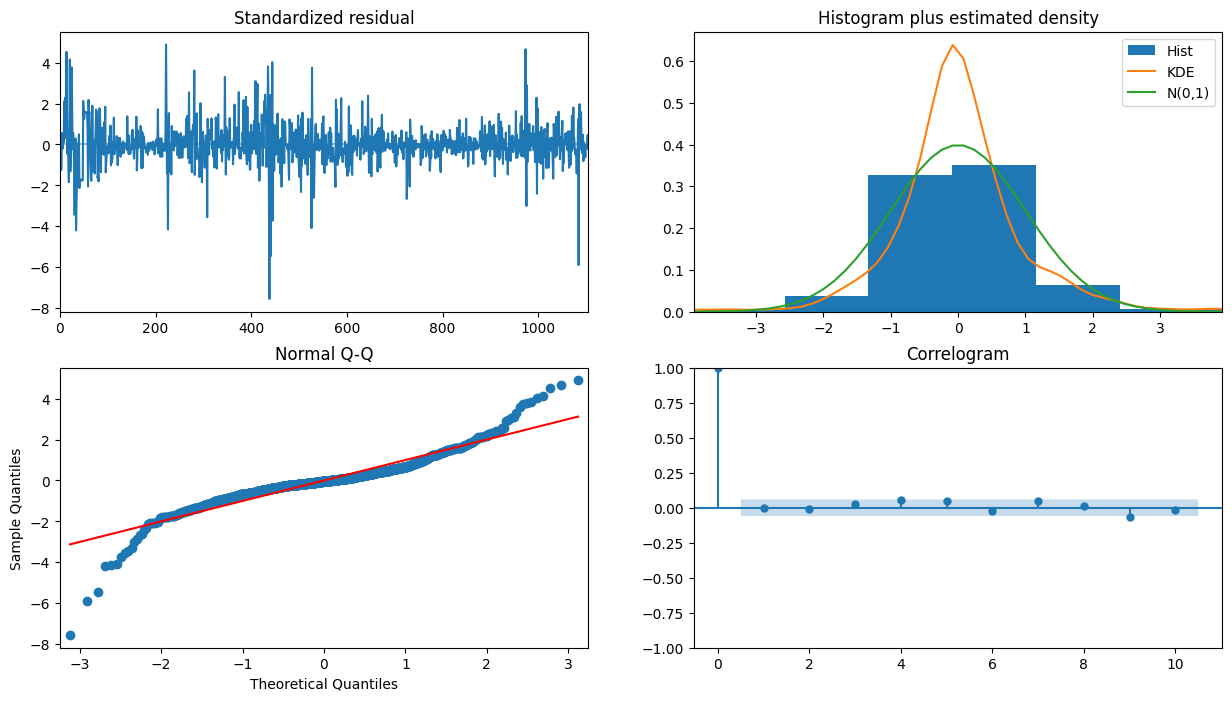

In [27]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [28]:
model = ARIMA(train_data, order=(2,1,0))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1106
Model:                 ARIMA(2, 1, 0)   Log Likelihood                2473.644
Date:                Tue, 22 Apr 2025   AIC                          -4941.288
Time:                        10:41:45   BIC                          -4926.266
Sample:                             0   HQIC                         -4935.606
                               - 1106                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1660      0.018      9.456      0.000       0.132       0.200
ar.L2         -0.0272      0.021     -1.286      0.198      -0.069       0.014
sigma2         0.0007   1.33e-05     49.947      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



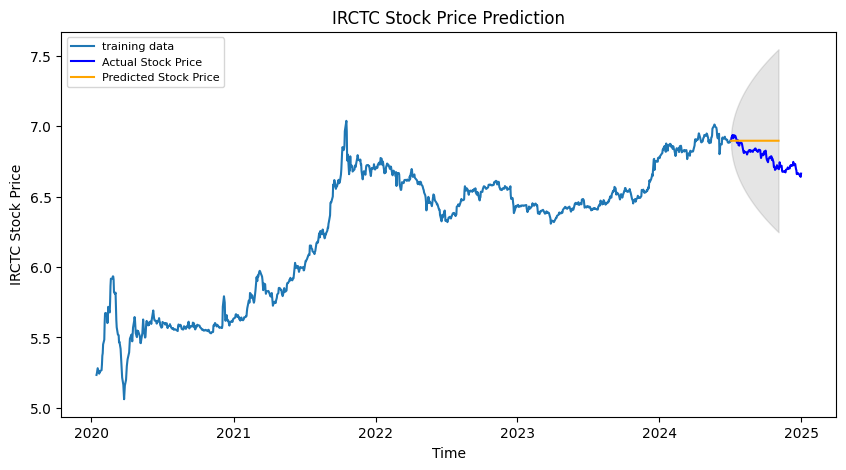

In [29]:
# Check forecast directly
forecast_result = fitted.get_forecast(steps=123)
fc = forecast_result.predicted_mean
conf = forecast_result.conf_int()
forecast_index = pd.date_range(start=test_data.index[0], periods=123, freq=test_data.index.freq)
fc_series = pd.Series(fc.values, index=forecast_index)
lower_series = pd.Series(conf.iloc[:, 0].values, index=forecast_index)
upper_series = pd.Series(conf.iloc[:, 1].values, index=forecast_index)
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.10)
plt.title('IRCTC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IRCTC Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#  Model Prediction

In [30]:
import statsmodels.api as sm
test_data_copy=test_data.copy()
Control=len(test_data)
ActualList=[]
PredictList=[]

model = sm.tsa.ARIMA(train_data, order=(2,1,0))
results = model.fit()
forecast = results.forecast(steps=1)

PredictList.append(forecast.iloc[0])
ActualList.append(test_data[0])

for date, value in test_data.items():

    train_data.loc[date] = value
    test_data = test_data.iloc[1:]
    model = sm.tsa.ARIMA(train_data, order=(2,1,0))
    results = model.fit()

    forecast = results.forecast(steps=1)
    PredictList.append(forecast.iloc[0])
    ActualList.append(test_data[0])

    if len(PredictList)==Control:
        break

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it ha

In [31]:
df_predict = pd.DataFrame({'Actual': ActualList, 'Predict': PredictList})
df_predict = df_predict.set_index(test_data_copy.index)
df_predict = np.exp(df_predict)

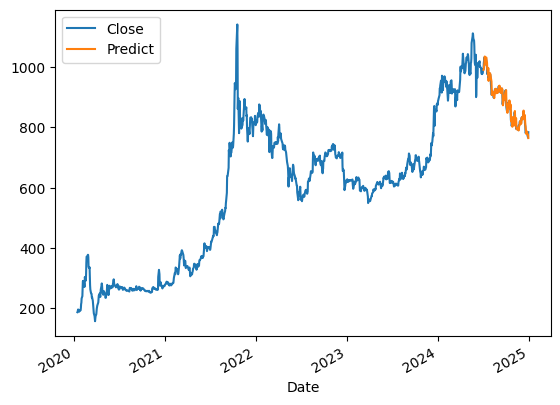

In [32]:
combined_df = pd.concat([data['Close'],df_predict['Predict']],axis=1).plot()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean squared error
mse = mean_squared_error(df_predict['Actual'], df_predict['Predict'])

# Calculate the R-squared score
r2 = r2_score(df_predict['Actual'], df_predict['Predict'])

# Print the results
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 164.9091557969814
R-squared Score: 0.9640123215880655


The last code performs a rolling forecast, where the ARIMA model is re-fitted at each step using the actual observed value from the test set. This simulates a real-world scenario where predictions are made one step at a time, and the model is continuously updated as new data becomes available. It is useful for evaluating how the model performs over time but is more computationally expensive due to repeated fitting.

The first code, on the other hand, fits the ARIMA model only once on the training data and forecasts the next 123 steps all at once. It then plots these predictions along with the actual values and confidence intervals. This method is faster and useful for getting an overview of the model’s performance over a longer horizon, but it doesn’t reflect how the model would behave in a live, step-by-step forecasting setting.

In essence, the first approach is better for realistic validation, while the second is better for quick, visual long-term predictions